### Customer Churn prediction and the objective of this project:
#### A customer churn prediction project involves using data analysis and machine learning techniques to predict when customers are likely to leave a business or service, commonly referred to as "churning." 

#### Churn prediction is a critical task for businesses in various industries, including telecommunications, subscription services, e-commerce, and more. The main goal of such a project is to proactively identify customers who are at risk of churning, allowing companies to take targeted actions to retain them

- importing useful library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


In [2]:
df= pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
df=pd.DataFrame(df)

## Let's call Dataset as df

In [4]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [5]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

### Dataset has 9 attributes. Let's explore little bit about that

- Age : Age of the Customer
- Gender : Gender of the Customer (Male/Female/other)
- Location : From where Customer belong 
- Subscription_Length_Months : as its usual meaning
- Monthally_Bill : as its usual meaning
- Total_usage_gb: how much GB used during subscription of each customer
- Churn : This is our last and important attribute of Dataset. "0" means customer is still our subscription and "1" means customer has cancelled the subscription
 


In [6]:
df.shape

(100000, 9)

### Dataset has 
- 100000 rows and 
- 9 columns

### Let's take some overview on df .We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling..

In [7]:
df.isnull().mean()

CustomerID                    0.0
Name                          0.0
Age                           0.0
Gender                        0.0
Location                      0.0
Subscription_Length_Months    0.0
Monthly_Bill                  0.0
Total_Usage_GB                0.0
Churn                         0.0
dtype: float64

- Well , df has no missing value

In [8]:
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

### from the above we will require two attributes. 
- 1. CustomerID
- 2. Name

### It will not help us in building the model , so dropped it.

In [9]:
df= df.drop(columns=['CustomerID','Name'], axis =1)

In [10]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


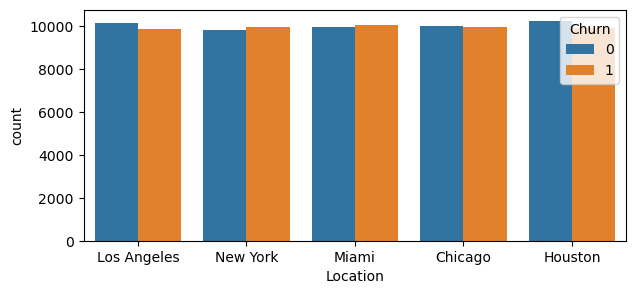

In [11]:
plt.figure(figsize=(7,3))
sns.countplot(x="Location",hue="Churn",data=df)
plt.show()

### All the location have almost equally churn rate.

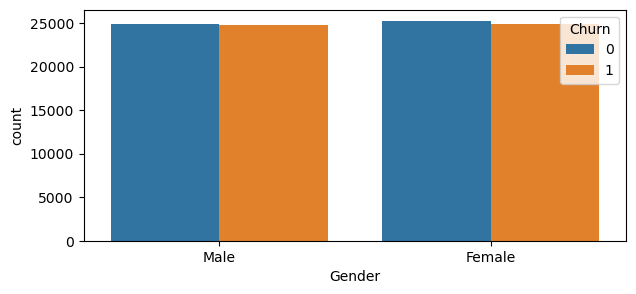

In [12]:
plt.figure(figsize=(7,3))
sns.countplot(x="Gender",hue="Churn",data=df)
plt.show()

### Both Gender are also showing equal churn rate

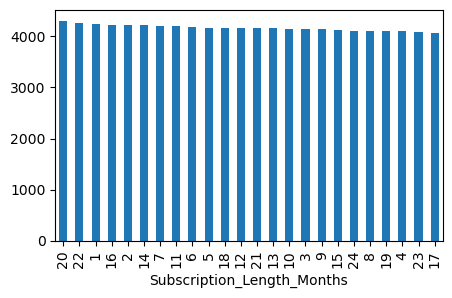

In [13]:
plt.figure(figsize=(5,3))
df.Subscription_Length_Months.value_counts().plot(kind='bar')
plt.show()

### Here we can see that there is no any factor in Subscription month by which we can define churn rate

In [14]:
a= df.groupby('Churn')['Subscription_Length_Months'].sum()

In [15]:
pd.DataFrame(a)

,Subscription_Length_Months
Churn,
0,626459
1,622551


### Both who cancelled and who are not have almost same value month of subscription

<Axes: xlabel='Subscription_Length_Months', ylabel='Count'>

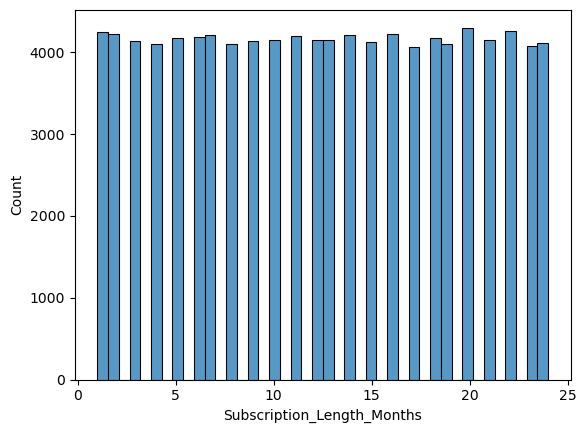

In [16]:
sns.histplot(df.Subscription_Length_Months)

<Axes: xlabel='Subscription_Length_Months', ylabel='Monthly_Bill'>

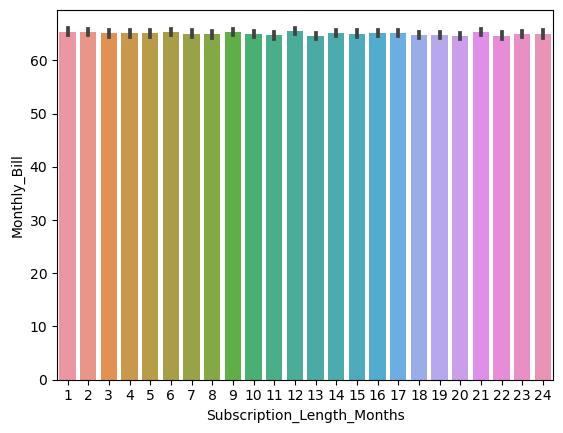

In [17]:
sns.barplot(x= df.Subscription_Length_Months, y=df.Monthly_Bill)

<Axes: xlabel='Churn', ylabel='Monthly_Bill'>

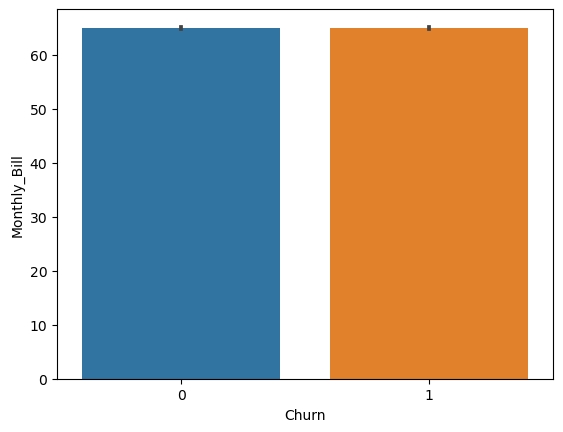

In [18]:
sns.barplot(x= df.Churn, y=df.Monthly_Bill)

In [19]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [20]:
df.groupby('Location')['Monthly_Bill'].sum()

Location
Chicago        1293664.73
Houston        1312783.60
Los Angeles    1306520.42
Miami          1301039.05
New York       1291311.88
Name: Monthly_Bill, dtype: float64

In [21]:
df.groupby('Churn')['Monthly_Bill'].sum()

Churn
0    3267250.33
1    3238069.35
Name: Monthly_Bill, dtype: float64

In [22]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


## Conclusion 

- it is showing almost equal nature with all columns . - 
- All Location , Gender values are showing equal nature in both weather customer has cancelled the subscription or not
- that is why it is tough to define that which columns is effecting more on churn rate . 
- And also this will effect the ML model accuracy

### splitting the dataset df into training and testing

In [23]:
X= df.iloc[:,0:6]
y= df.iloc[:,-1]

In [24]:
X.shape

(100000, 6)

In [25]:
X.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,Male,Los Angeles,17,73.36,236
1,62,Female,New York,1,48.76,172
2,24,Female,Los Angeles,5,85.47,460
3,36,Female,Miami,3,97.94,297
4,46,Female,Miami,19,58.14,266


In [26]:
y.shape

(100000,)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [28]:
X_train.shape

(85000, 6)

In [29]:
X_test.shape

(15000, 6)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
for i in range(X_train.shape[1]):
    print(X_train.columns[i],i)

Age 0
Gender 1
Location 2
Subscription_Length_Months 3
Monthly_Bill 4
Total_Usage_GB 5


### Building ML pipeline 

#### algorithm  - Random Forest

In [32]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse= False ,drop='first'),[1,2])
],remainder='passthrough')

step11= ColumnTransformer(transformers=[
    ('scaling', MinMaxScaler(),[0,3,4,5])
])

# step2 = LogisticRegression()
step2= RandomForestClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step11',step11),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

C:\Users\as\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [1, 2])])),
                ('step11',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  [0, 3, 4, 5])])),
                ('step2', RandomForestClassifier())])

In [33]:
y_pred= pipe.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix


### accuracy of model 

In [35]:
accuracy_score(y_test,y_pred)

0.5010666666666667

### Accuracy of Model is not good .. it is because of our Dataset.

In [36]:
confusion_matrix(y_test,y_pred)

array([[3974, 3564],
       [3920, 3542]], dtype=int64)

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

C:\Users\as\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\as\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\as\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\as\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

0.5018235294117648

In [51]:
pipe.predict([[51,"Male","Houston",10,82.11,68]])

C:\Users\as\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [44]:
X.Location.value_counts()

Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: count, dtype: int64

In [43]:
X.isnull().mean()

Age                           0.0
Gender                        0.0
Location                      0.0
Subscription_Length_Months    0.0
Monthly_Bill                  0.0
Total_Usage_GB                0.0
dtype: float64

## implementation of Model as user point of use

In [ ]:
import pickle 

In [ ]:
pickle.dump(pipe,open('churn_prediction.pkl','wb'))

In [ ]:
aaa

In [ ]:
def check_model():
    try:
    
        age= int(input('What is your age \n'))
        gender= input('What is your Gender')
        location = input('What is your location 1. Miami 2. Chicago 3.New York 4. Los Angeles 5. Houston \n')
        month= int(input('subscription month \n'))
        bill= int(input('What is your monthly bill \n'))
        gb= int(input('total uses of GB \n'))
        pred= pipe.predict([[age,gender,location,month,bill,gb]])
        output= int(pred[0])

        if output==1:
            print('Customer will cancel the subscription')
        else:
            print('Customer will remain')
            
    except Exception as e:
        print(e)

## values from user input ---

#### user 1

In [ ]:
check_model()

#### user 2

In [ ]:
check_model()

#### user 3

In [ ]:
check_model()

#### user 4

In [ ]:
check_model()

## Here I filled the wrong value in age input

In [ ]:
check_model()

## Note- As you said to deploy the model on server but to be honest right now I am learning AWS for deployment ... That is Why I could not deploy model.

## Thank You :) 

# Done !!